In [1]:
# ! pip install nltk

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
from collections import Counter
import nltk
import string
from nltk.tokenize import word_tokenize

import math

In [1]:
# !pip install -U spacy-lookups-data

  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.2.0-py2.py3-none-any.whl size=29164788 sha256=b52ed8945e6434d48ded9a2d4b04e201f95671d858676c4762a038f786c24192
  Stored in directory: C:\Users\Windows 10\AppData\Local\pip\Cache\wheels\79\a4\b8\6085d282396938b29675292697e72871b145990d0079ceadc1
Successfully built spacy-lookups-data


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#!pip install -U spacy

  Found existing installation: tqdm 4.32.1
    Uninstalling tqdm-4.32.1:
      Successfully uninstalled tqdm-4.32.1
  Found existing installation: importlib-metadata 0.17
    Uninstalling importlib-metadata-0.17:
      Successfully uninstalled importlib-metadata-0.17


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
#! python -m spacy download en

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-cp37-none-any.whl size=12011744 sha256=d369b490feac86e2d662b9d773100692e940c51152be95d2bd465e3a1a593736
  Stored in directory: C:\Users\WINDOW~1\AppData\Local\Temp\pip-ephem-wheel-cache-py886wp7\wheels\6a\47\fb\6b5a0b8906d8e8779246c67d4658fd8a544d4a03a75520197a
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\Windows 10\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\Windows 10\Anaconda3\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissio

You should consider upgrading via the 'python -m pip install --upgrade pip' command.
You do not have sufficient privilege to perform this operation.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import spacy

In [3]:
df = pd.read_csv('spam.tsv', sep='\t', names=['label','Message'])
df.head()

,label,Message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!


In [4]:
df.isnull().sum()

label      0
Message    0
dtype: int64

In [5]:
len(df)

5567

In [6]:
df['label'].value_counts()

ham     4821
spam     746
Name: label, dtype: int64

In [7]:
ham =df[df['label'] == 'ham']
ham.head()

,label,Message
0,ham,I've been searching for the right words to tha...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!
5,ham,As per your request 'Melle Melle (Oru Minnamin...


In [8]:
spam =df[df['label'] == 'spam']

spam.head()

,label,Message
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
6,spam,WINNER!! As a valued network customer you have...
7,spam,Had your mobile 11 months or more? U R entitle...
9,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
10,spam,URGENT! You have won a 1 week FREE membership ...


In [9]:
ham.shape, spam.shape

((4821, 2), (746, 2))

In [10]:
data =ham.append(spam, ignore_index=True)
data.head()

,label,Message
0,ham,I've been searching for the right words to tha...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [11]:
data.tail()

,label,Message
5562,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5563,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5564,spam,Had your contract mobile 11 Mnths? Latest Moto...
5565,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5566,spam,This is the 2nd time we have tried 2 contact u...


### Data Preparation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['label'], test_size=0.3, 
                                                    random_state =0, shuffle =True, stratify=df['label'])

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3896,) (3896,)
(1671,) (1671,)


### Bag of word creation

In [26]:
vectorizer = TfidfVectorizer()

In [27]:
X_train_vec = vectorizer.fit_transform(X_train)

In [29]:
X_train_vec.shape

(3896, 7131)

In [30]:
X_train_vec

<3896x7131 sparse matrix of type '<class 'numpy.float64'>'
	with 51587 stored elements in Compressed Sparse Row format>

In [31]:
(3896*7131)

27782376

### Pipeline and RF

In [33]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators= 100, n_jobs= -1))])

In [34]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [35]:
y_pred =clf.predict(X_test)

In [47]:
confusion_matrix(y_test, y_pred)

array([[1447,    0],
       [  34,  190]], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1447
        spam       1.00      0.85      0.92       224

    accuracy                           0.98      1671
   macro avg       0.99      0.92      0.95      1671
weighted avg       0.98      0.98      0.98      1671



In [49]:
accuracy_score(y_test, y_pred)

0.9796529024536206

In [50]:
clf.predict(["how are you"])

array(['ham'], dtype=object)

In [56]:
clf.predict(["Congratulations ur awarded either £500 of CD gift vouchers & Free entry 2 our £100 weekly."])

array(['spam'], dtype=object)

In [63]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C= 100, gamma='auto'))])

In [64]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto

In [65]:
y_pred =clf.predict(X_test)

In [66]:
confusion_matrix(y_test, y_pred)

array([[1447,    0],
       [ 224,    0]], dtype=int64)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1447
        spam       0.00      0.00      0.00       224

    accuracy                           0.87      1671
   macro avg       0.43      0.50      0.46      1671
weighted avg       0.75      0.87      0.80      1671



In [3]:
# ! pip install python-docx

  Created wheel for python-docx: filename=python_docx-0.8.10-cp37-none-any.whl size=184496 sha256=c00453636b3f775aa1f6b5d394c4aef4870afec0d099a9df43c380dea973b32e
  Stored in directory: C:\Users\Windows 10\AppData\Local\pip\Cache\wheels\18\0b\a0\1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
def fun(a,k):
    print(a)
    print('value of K:', k)
    for x in a:
        if x==k:
            return "yes"
        else:
            return "no"
        
fun([11,22,33,87], 87)

[11, 22, 33, 87]
value of K: 87


'no'

In [6]:
import os 

In [9]:
fd = "GFG.txt"
  
# popen() is similar to open() 
file = open(fd, 'w') 
file.write("Hello world") 
file.close()

In [10]:
file = open(fd, 'r') 
text = file.read() 
print(text) 

Hello world


In [5]:
import docx

In [12]:
doc = docx.Document()

doc.add_heading('Document1')
doc.add_paragraph('p1')

In [13]:
doc.add_paragraph('p2')

In [14]:
doc.add_page_break()

In [15]:
doc.add_heading('Document2')

In [17]:
doc.save('Mydoc.docx')

In [34]:
from docx import Document

In [35]:
d = Document("Mydoc.docx") 

In [37]:
for para in d.paragraphs:
    print(para.text)

Document1
p1
p2


Document2


In [4]:
import nltk

In [5]:
# nltk.download()

In [6]:
from nltk.corpus import names

In [7]:
names.words()

['Abagael',
 'Abagail',
 'Abbe',
 'Abbey',
 'Abbi',
 'Abbie',
 'Abby',
 'Abigael',
 'Abigail',
 'Abigale',
 'Abra',
 'Acacia',
 'Ada',
 'Adah',
 'Adaline',
 'Adara',
 'Addie',
 'Addis',
 'Adel',
 'Adela',
 'Adelaide',
 'Adele',
 'Adelice',
 'Adelina',
 'Adelind',
 'Adeline',
 'Adella',
 'Adelle',
 'Adena',
 'Adey',
 'Adi',
 'Adiana',
 'Adina',
 'Adora',
 'Adore',
 'Adoree',
 'Adorne',
 'Adrea',
 'Adria',
 'Adriaens',
 'Adrian',
 'Adriana',
 'Adriane',
 'Adrianna',
 'Adrianne',
 'Adrien',
 'Adriena',
 'Adrienne',
 'Aeriel',
 'Aeriela',
 'Aeriell',
 'Ag',
 'Agace',
 'Agata',
 'Agatha',
 'Agathe',
 'Aggi',
 'Aggie',
 'Aggy',
 'Agna',
 'Agnella',
 'Agnes',
 'Agnese',
 'Agnesse',
 'Agneta',
 'Agnola',
 'Agretha',
 'Aida',
 'Aidan',
 'Aigneis',
 'Aila',
 'Aile',
 'Ailee',
 'Aileen',
 'Ailene',
 'Ailey',
 'Aili',
 'Ailina',
 'Ailyn',
 'Aime',
 'Aimee',
 'Aimil',
 'Aina',
 'Aindrea',
 'Ainslee',
 'Ainsley',
 'Ainslie',
 'Ajay',
 'Alaine',
 'Alameda',
 'Alana',
 'Alanah',
 'Alane',
 'Alanna',
 

In [8]:
from nltk.tokenize import sent_tokenize

In [9]:
sample = "We present a model that generates natural language descriptions of images and their regions. Our approach leverages datasets of images and their sentence descriptions to learn about the inter-modal correspondences between language and visual data. Our alignment model is based on a novel combination of Convolutional Neural Networks over image regions, bidirectional Recurrent Neural Networks over sentences, and a structured objective that aligns the two modalities through a multimodal embedding. We then describe a Multimodal Recurrent Neural Network architecture that uses the inferred alignments to learn to generate novel descriptions of image regions. We demonstrate that our alignment model produces state of the art results in retrieval experiments on Flickr8K, Flickr30K and MSCOCO datasets. We then show that the generated descriptions significantly outperform retrieval baselines on both full images and on a new dataset of region-level annotations."

In [10]:
tokenized_text = sent_tokenize(sample)

In [11]:
print(tokenized_text)

['We present a model that generates natural language descriptions of images and their regions.', 'Our approach leverages datasets of images and their sentence descriptions to learn about the inter-modal correspondences between language and visual data.', 'Our alignment model is based on a novel combination of Convolutional Neural Networks over image regions, bidirectional Recurrent Neural Networks over sentences, and a structured objective that aligns the two modalities through a multimodal embedding.', 'We then describe a Multimodal Recurrent Neural Network architecture that uses the inferred alignments to learn to generate novel descriptions of image regions.', 'We demonstrate that our alignment model produces state of the art results in retrieval experiments on Flickr8K, Flickr30K and MSCOCO datasets.', 'We then show that the generated descriptions significantly outperform retrieval baselines on both full images and on a new dataset of region-level annotations.']


In [12]:
tokenized_text[:3]

['We present a model that generates natural language descriptions of images and their regions.',
 'Our approach leverages datasets of images and their sentence descriptions to learn about the inter-modal correspondences between language and visual data.',
 'Our alignment model is based on a novel combination of Convolutional Neural Networks over image regions, bidirectional Recurrent Neural Networks over sentences, and a structured objective that aligns the two modalities through a multimodal embedding.']

In [13]:
from nltk.corpus import gutenberg

In [14]:
sample =gutenberg.raw("bible-kjv.txt")  #bryant-stories

In [15]:
tokenized_text = sent_tokenize(sample)

In [16]:
tokenized_text

['[The King James Bible]\n\nThe Old Testament of the King James Bible\n\nThe First Book of Moses:  Called Genesis\n\n\n1:1 In the beginning God created the heaven and the earth.',
 '1:2 And the earth was without form, and void; and darkness was upon\nthe face of the deep.',
 'And the Spirit of God moved upon the face of the\nwaters.',
 '1:3 And God said, Let there be light: and there was light.',
 '1:4 And God saw the light, that it was good: and God divided the light\nfrom the darkness.',
 '1:5 And God called the light Day, and the darkness he called Night.',
 'And the evening and the morning were the first day.',
 '1:6 And God said, Let there be a firmament in the midst of the waters,\nand let it divide the waters from the waters.',
 '1:7 And God made the firmament, and divided the waters which were\nunder the firmament from the waters which were above the firmament:\nand it was so.',
 '1:8 And God called the firmament Heaven.',
 'And the evening and the\nmorning were the second day.

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
sample = "We present a model that generates natural language descriptions of images and their regions. Our approach leverages datasets of images and their sentence descriptions to learn about the inter-modal correspondences between language and visual data. Our alignment model is based on a novel combination of Convolutional Neural Networks over image regions, bidirectional Recurrent Neural Networks over sentences, and a structured objective that aligns the two modalities through a multimodal embedding. We then describe a Multimodal Recurrent Neural Network architecture that uses the inferred alignments to learn to generate novel descriptions of image regions. We demonstrate that our alignment model produces state of the art results in retrieval experiments on Flickr8K, Flickr30K and MSCOCO datasets. We then show that the generated descriptions significantly outperform retrieval baselines on both full images and on a new dataset of region-level annotations."

In [19]:
tokenized_word = word_tokenize(sample)

print(tokenized_word[:45])

['We', 'present', 'a', 'model', 'that', 'generates', 'natural', 'language', 'descriptions', 'of', 'images', 'and', 'their', 'regions', '.', 'Our', 'approach', 'leverages', 'datasets', 'of', 'images', 'and', 'their', 'sentence', 'descriptions', 'to', 'learn', 'about', 'the', 'inter-modal', 'correspondences', 'between', 'language', 'and', 'visual', 'data', '.', 'Our', 'alignment', 'model', 'is', 'based', 'on', 'a', 'novel']


In [20]:
from nltk.tokenize import RegexpTokenizer

In [21]:
tokenized_regexp = RegexpTokenizer('[A-Z]\w+')

tokenized_regexp.tokenize(sample)[:15]

['We',
 'Our',
 'Our',
 'Convolutional',
 'Neural',
 'Networks',
 'Recurrent',
 'Neural',
 'Networks',
 'We',
 'Multimodal',
 'Recurrent',
 'Neural',
 'Network',
 'We']

In [22]:
tokenized_regexp = RegexpTokenizer('[0-9]\d+')

tokenized_regexp.tokenize(sample)

['30']

In [23]:
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg
from nltk.probability import FreqDist

In [24]:
sample =gutenberg.raw("carroll-alice.txt") 

In [25]:
tokenized_word = word_tokenize(sample)

fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 3185 samples and 33493 outcomes>


In [26]:
fdist.most_common(15)

[(',', 2418),
 ('the', 1516),
 ("'", 1309),
 ('.', 975),
 ('and', 757),
 ('to', 717),
 ('a', 614),
 ('I', 533),
 ('it', 512),
 ('she', 506),
 ('of', 496),
 ('said', 456),
 ('!', 450),
 ('Alice', 394),
 ('was', 361)]

In [27]:
fdist.plot(15);

<Figure size 640x480 with 1 Axes>

In [28]:
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))
print(stop_words)

{'only', "you've", 'not', "shan't", 'on', 'my', 'do', 'a', 'now', 'these', 'll', 'have', 'that', 'does', 'if', 'who', "she's", 'hadn', 'we', 'below', "wouldn't", 'few', 'doing', 'the', 'been', 'is', 'further', 'itself', 'how', 'no', 'from', 'where', 'down', 'ourselves', 'and', 'while', 'hasn', 'its', 'an', 'mightn', 'they', 'it', 'after', 'as', "didn't", 'against', 'isn', 'couldn', 'with', 'them', 'was', 'why', 'had', 'herself', 't', 'mustn', 'theirs', 'because', "hasn't", 're', 'are', 'be', 'then', 'up', "mightn't", 'you', 'both', 'his', 'm', 'me', "couldn't", 'doesn', 'your', 'has', 'out', 'other', 'am', "you'll", 'ma', 'being', 'haven', 'here', 'which', 'between', "should've", 'same', 'this', 'he', 'ain', 'myself', 'very', 've', 'himself', 'under', 'just', 'yourself', 'will', 'off', 'of', 'wasn', 'there', 'i', 'hers', 'or', 'd', "it's", 'into', 'needn', "shouldn't", "weren't", 'too', 'before', 'don', 'shouldn', 'any', 'each', "doesn't", "don't", 'own', 'him', 'wouldn', 's', 'such', 

In [29]:
filtered_word =[]

In [30]:
for w in tokenized_word:
    if w not in stop_words:
        if len(w) >3:
            filtered_word.append(w)

In [31]:
fdist = FreqDist(filtered_word)
print(fdist)

<FreqDist with 2733 samples and 11589 outcomes>


In [32]:
fdist.most_common(20)

[('said', 456),
 ('Alice', 394),
 ('little', 125),
 ('know', 87),
 ('like', 84),
 ('went', 83),
 ('could', 82),
 ('would', 82),
 ('thought', 74),
 ('Queen', 74),
 ('time', 65),
 ('King', 60),
 ('began', 58),
 ('Turtle', 58),
 ('Mock', 56),
 ('Hatter', 55),
 ('Gryphon', 54),
 ('quite', 53),
 ('much', 51),
 ('think', 50)]

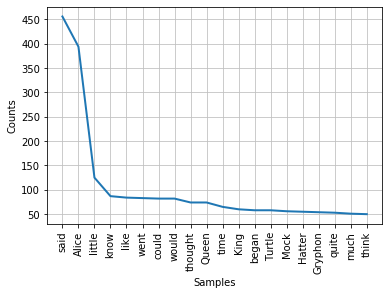

In [33]:
fdist.plot(20)

### Bigrams

In [34]:
from nltk.corpus import stopwords, webtext
from nltk import bigrams, trigrams

In [35]:
text_word = [w.lower() for w in webtext.words("pirates.txt")]

stop_words = set(stopwords.words('english'))

filtered_word= []
for w in text_word:
    if w not in stop_words:
        if len(w) >3:
            filtered_word.append(w)

In [36]:
print(filtered_word[:15])

['pirates', 'carribean', 'dead', 'chest', 'elliott', 'terry', 'rossio', 'view', 'looking', 'straight', 'rolling', 'swells', 'sound', 'wind', 'thunder']


In [37]:
Bigram = bigrams(filtered_word)

fdist = FreqDist(Bigram)

In [38]:
fdist.most_common(20)

[(('jack', 'sparrow'), 222),
 (('elizabeth', 'swann'), 93),
 (('davy', 'jones'), 58),
 (('black', 'pearl'), 37),
 (('flying', 'dutchman'), 37),
 (('lord', 'cutler'), 35),
 (('cutler', 'beckett'), 35),
 (('pintel', 'ragetti'), 24),
 (('turner', 'jack'), 14),
 (('cannibal', 'island'), 14),
 (('sparrow', 'jack'), 13),
 (('jack', 'jack'), 13),
 (('scene', 'cannibal'), 13),
 (('port', 'royal'), 11),
 (('captain', 'jack'), 10),
 (('bamboo', 'pole'), 9),
 (('scene', 'black'), 8),
 (('cotton', 'parrot'), 8),
 (('gibbs', 'jack'), 8),
 (('sparrow', 'turner'), 8)]

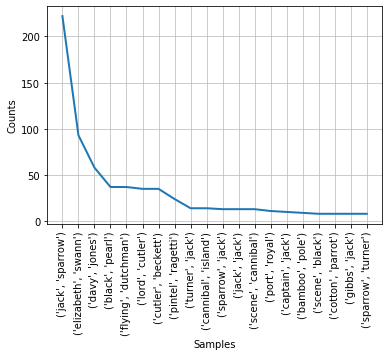

In [39]:
fdist.plot(20)

### Trigrams

In [40]:
text_word = [w.lower() for w in webtext.words("grail.txt")]

stop_words = set(stopwords.words('english'))

filtered_word= []
for w in text_word:
    if w not in stop_words:
        if len(w) >3:
            filtered_word.append(w)

In [41]:
print(filtered_word[:15])

['scene', 'wind', 'clop', 'clop', 'clop', 'king', 'arthur', 'whoa', 'clop', 'clop', 'clop', 'soldier', 'halt', 'goes', 'arthur']


In [42]:
trigram = trigrams(filtered_word)

fdist = FreqDist(trigram)

In [43]:
fdist.most_common(20)

[(('hello', 'hello', 'hello'), 21),
 (('squeak', 'squeak', 'squeak'), 15),
 (('clop', 'clop', 'clop'), 13),
 (('witch', 'witch', 'witch'), 13),
 (('burn', 'burn', 'burn'), 13),
 (('mumble', 'mumble', 'mumble'), 10),
 (('clang', 'bring', 'dead'), 9),
 (('king', 'arthur', 'music'), 9),
 (('mumble', 'mumble', 'boom'), 9),
 (('bring', 'dead', 'clang'), 8),
 (('dead', 'clang', 'bring'), 8),
 (('boom', 'mumble', 'mumble'), 8),
 (('guests', 'singing', 'going'), 8),
 (('singing', 'going', 'tell'), 8),
 (('mumble', 'boom', 'mumble'), 7),
 (('arthur', 'king', 'britons'), 6),
 (('music', 'music', 'stops'), 6),
 (('away', 'away', 'away'), 6),
 (('make', 'sure', 'leave'), 6),
 (('monks', 'chanting', 'iesu'), 5)]

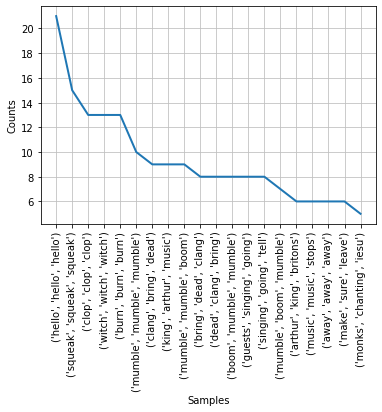

In [44]:
fdist.plot(20)

### Ngrams

In [45]:
from nltk.corpus import stopwords, gutenberg
from nltk import ngrams

In [46]:
text_word = [w.lower() for w in gutenberg.words("shakespeare-hamlet.txt")]

stop_words = set(stopwords.words('english'))

filtered_word= []
for w in text_word:
    if w not in stop_words:
        if len(w) >3:
            filtered_word.append(w)

In [47]:
print(filtered_word[:15])

['tragedie', 'hamlet', 'william', 'shakespeare', '1599', 'actus', 'primus', 'scoena', 'prima', 'enter', 'barnardo', 'francisco', 'centinels', 'barnardo', 'fran']


In [48]:
ngram = ngrams(filtered_word, 4)

fdist = FreqDist(ngram)

In [49]:
fdist.most_common(20)

[(('reynol', 'good', 'lord', 'polon'), 3),
 (('exeunt', 'scena', 'secunda', 'enter'), 2),
 (('lord', 'exeunt', 'enter', 'hamlet'), 2),
 (('exeunt', 'enter', 'hamlet', 'horatio'), 2),
 (('lord', 'haue', 'newes', 'tell'), 2),
 (('enter', 'king', 'queene', 'polonius'), 2),
 (('king', 'queene', 'polonius', 'ophelia'), 2),
 (('queene', 'polonius', 'ophelia', 'rosincrance'), 2),
 (('helpe', 'helpe', 'helpe', 'helpe'), 2),
 (('clay', 'made', 'guest', 'meete'), 2),
 (('enter', 'king', 'queene', 'laertes'), 2),
 (('tragedie', 'hamlet', 'william', 'shakespeare'), 1),
 (('hamlet', 'william', 'shakespeare', '1599'), 1),
 (('william', 'shakespeare', '1599', 'actus'), 1),
 (('shakespeare', '1599', 'actus', 'primus'), 1),
 (('1599', 'actus', 'primus', 'scoena'), 1),
 (('actus', 'primus', 'scoena', 'prima'), 1),
 (('primus', 'scoena', 'prima', 'enter'), 1),
 (('scoena', 'prima', 'enter', 'barnardo'), 1),
 (('prima', 'enter', 'barnardo', 'francisco'), 1)]

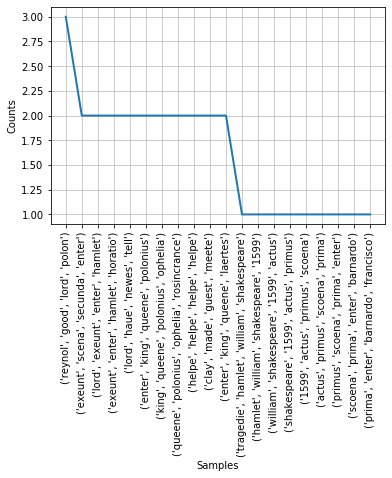

In [50]:
fdist.plot(20);

### Stemming

In [51]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [52]:
ps =PorterStemmer()

In [53]:
sample = "We are presenting a model that generates natural language descriptions of images and their regions. Our approach leverages datasets of images and their sentence descriptions to learn about the inter-modal correspondences between language and visual data. Our alignment model is based on a novel combination of Convolutional Neural Networks over image regions, bidirectional Recurrent Neural Networks over sentences, and a structured objective that aligns the two modalities through a multimodal embedding. We then describe a Multimodal Recurrent Neural Network architecture that uses the inferred alignments to learn to generate novel descriptions of image regions. We demonstrate that our alignment model produces state of the art results in retrieval experiments on Flickr8K, Flickr30K and MSCOCO datasets. We then show that the generated descriptions significantly outperform retrieval baselines on both full images and on a new dataset of region-level annotations."

In [54]:
word = word_tokenize(sample)

for w in word:
    print(ps.stem(w))

We
are
present
a
model
that
gener
natur
languag
descript
of
imag
and
their
region
.
our
approach
leverag
dataset
of
imag
and
their
sentenc
descript
to
learn
about
the
inter-mod
correspond
between
languag
and
visual
data
.
our
align
model
is
base
on
a
novel
combin
of
convolut
neural
network
over
imag
region
,
bidirect
recurr
neural
network
over
sentenc
,
and
a
structur
object
that
align
the
two
modal
through
a
multimod
embed
.
We
then
describ
a
multimod
recurr
neural
network
architectur
that
use
the
infer
align
to
learn
to
gener
novel
descript
of
imag
region
.
We
demonstr
that
our
align
model
produc
state
of
the
art
result
in
retriev
experi
on
flickr8k
,
flickr30k
and
mscoco
dataset
.
We
then
show
that
the
gener
descript
significantli
outperform
retriev
baselin
on
both
full
imag
and
on
a
new
dataset
of
region-level
annot
.


### Lemmatization

In [55]:
from nltk.stem import WordNetLemmatizer

In [56]:
lem = WordNetLemmatizer()

words=  ['best','cacti','feet','cats','bats']

for w in words:
    print(lem.lemmatize(w))

best
cactus
foot
cat
bat


In [57]:
print(lem.lemmatize('faster', pos='a'))

fast


### POS tagging

In [58]:
from nltk import pos_tag

In [59]:
sample

'We are presenting a model that generates natural language descriptions of images and their regions. Our approach leverages datasets of images and their sentence descriptions to learn about the inter-modal correspondences between language and visual data. Our alignment model is based on a novel combination of Convolutional Neural Networks over image regions, bidirectional Recurrent Neural Networks over sentences, and a structured objective that aligns the two modalities through a multimodal embedding. We then describe a Multimodal Recurrent Neural Network architecture that uses the inferred alignments to learn to generate novel descriptions of image regions. We demonstrate that our alignment model produces state of the art results in retrieval experiments on Flickr8K, Flickr30K and MSCOCO datasets. We then show that the generated descriptions significantly outperform retrieval baselines on both full images and on a new dataset of region-level annotations.'

In [60]:
tokenized_word = word_tokenize(sample)

print(tokenized_word[:45])

['We', 'are', 'presenting', 'a', 'model', 'that', 'generates', 'natural', 'language', 'descriptions', 'of', 'images', 'and', 'their', 'regions', '.', 'Our', 'approach', 'leverages', 'datasets', 'of', 'images', 'and', 'their', 'sentence', 'descriptions', 'to', 'learn', 'about', 'the', 'inter-modal', 'correspondences', 'between', 'language', 'and', 'visual', 'data', '.', 'Our', 'alignment', 'model', 'is', 'based', 'on', 'a']


In [61]:
pos_tag(tokenized_word[:45])

[('We', 'PRP'),
 ('are', 'VBP'),
 ('presenting', 'VBG'),
 ('a', 'DT'),
 ('model', 'NN'),
 ('that', 'WDT'),
 ('generates', 'VBZ'),
 ('natural', 'JJ'),
 ('language', 'NN'),
 ('descriptions', 'NNS'),
 ('of', 'IN'),
 ('images', 'NNS'),
 ('and', 'CC'),
 ('their', 'PRP$'),
 ('regions', 'NNS'),
 ('.', '.'),
 ('Our', 'PRP$'),
 ('approach', 'NN'),
 ('leverages', 'VBZ'),
 ('datasets', 'NNS'),
 ('of', 'IN'),
 ('images', 'NNS'),
 ('and', 'CC'),
 ('their', 'PRP$'),
 ('sentence', 'NN'),
 ('descriptions', 'NNS'),
 ('to', 'TO'),
 ('learn', 'VB'),
 ('about', 'IN'),
 ('the', 'DT'),
 ('inter-modal', 'JJ'),
 ('correspondences', 'NNS'),
 ('between', 'IN'),
 ('language', 'NN'),
 ('and', 'CC'),
 ('visual', 'JJ'),
 ('data', 'NN'),
 ('.', '.'),
 ('Our', 'PRP$'),
 ('alignment', 'JJ'),
 ('model', 'NN'),
 ('is', 'VBZ'),
 ('based', 'VBN'),
 ('on', 'IN'),
 ('a', 'DT')]

### Named entity org with NLTK

In [62]:
from nltk.corpus import state_union

In [63]:
sample = state_union.raw("2005-GwBush.txt")

In [64]:
tokenized_word = word_tokenize(sample)

print(tokenized_word[:45])

['PRESIDENT', 'GEORGE', 'W.', 'BUSH', "'S", 'ADDRESS', 'BEFORE', 'A', 'JOINT', 'SESSION', 'OF', 'THE', 'CONGRESS', 'ON', 'THE', 'STATE', 'OF', 'THE', 'UNION', 'February', '2', ',', '2005', '9:10', 'P.M.', 'EST', 'THE', 'PRESIDENT', ':', 'Mr.', 'Speaker', ',', 'Vice', 'President', 'Cheney', ',', 'members', 'of', 'Congress', ',', 'fellow', 'citizens', ':', 'As', 'a']


In [72]:
pos_words =pos_tag(tokenized_word[:20])


In [73]:
print(pos_words)

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('February', 'NNP')]


In [74]:
from nltk import ne_chunk

In [75]:
ner_word = ne_chunk(pos_words)
ner_word

The Ghostscript executable isn't found.
See http://web.mit.edu/ghostscript/www/Install.htm
If you're using a Mac, you can try installing
https://docs.brew.sh/Installation then `brew install ghostscript`


LookupError: 

Tree('S', [('PRESIDENT', 'NNP'), Tree('PERSON', [('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP')]), ("'S", 'POS'), Tree('ORGANIZATION', [('ADDRESS', 'NNP')]), ('BEFORE', 'IN'), ('A', 'NNP'), Tree('ORGANIZATION', [('JOINT', 'NNP')]), ('SESSION', 'NNP'), ('OF', 'IN'), Tree('ORGANIZATION', [('THE', 'NNP')]), Tree('ORGANIZATION', [('CONGRESS', 'NNP')]), ('ON', 'NNP'), ('THE', 'NNP'), Tree('ORGANIZATION', [('STATE', 'NNP'), ('OF', 'IN')]), Tree('ORGANIZATION', [('THE', 'NNP')]), Tree('ORGANIZATION', [('UNION', 'NNP')]), ('February', 'NNP')])